## Student: Hossam-eldin Rashad Ramadan Abdelsalam

# $Sunspot. Analysis$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

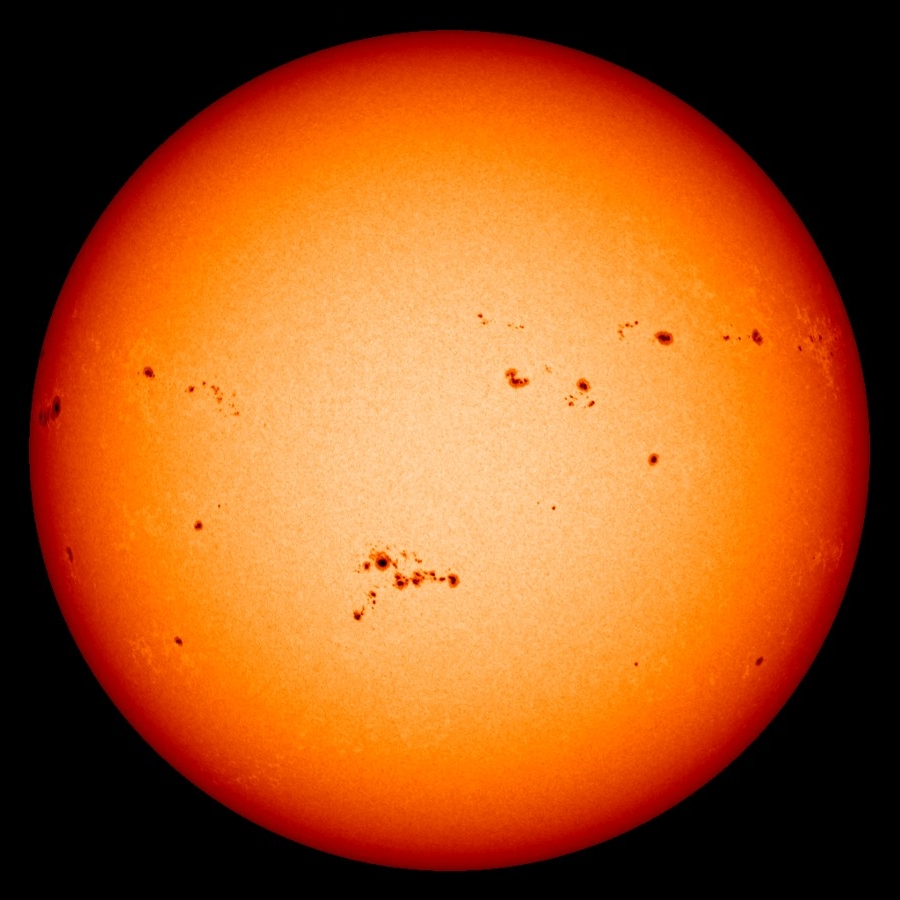

In [2]:
img = Image.open("SUN_IMG.jpg")
img

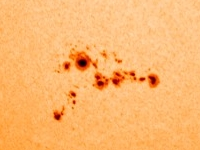

In [3]:
img.crop((300,500,500,650))

In [4]:
img_array = np.asarray(img)
img_cropped = np.asarray(img.crop((300,500,500,650)))

In [5]:
img_array.shape

(900, 900, 3)

In [6]:
img_cropped.shape

(150, 200, 3)

In [7]:
red_array = img_array[:,:,0].reshape(900 * 900)
green_array = img_array[:,:,1].reshape(900 * 900)
blue_array = img_array[:,:,2].reshape(900 * 900)

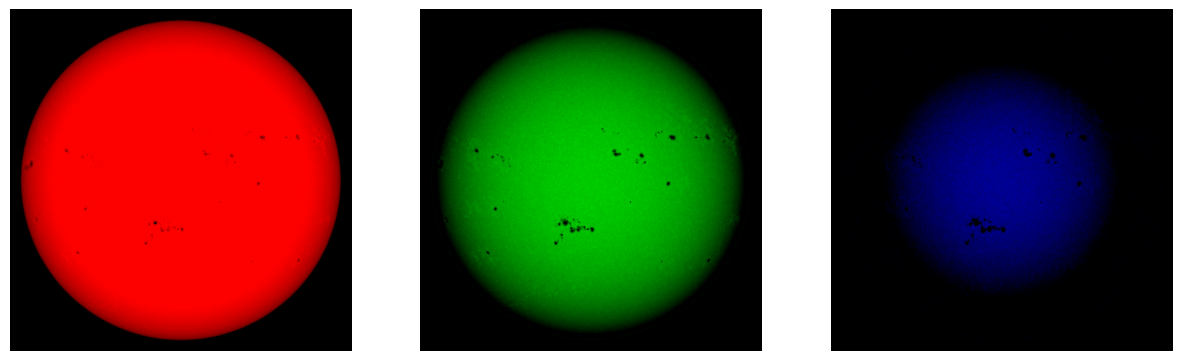

In [8]:
plt.figure(figsize=(15,15))
for i,j,p in ((0,1,3),(1,2,1),(2,0,2)) :
    q = img_array.copy()
    q[:,:,i] = 0
    q[:,:,j] = 0
    plt.subplot(1,3,p)
    plt.imshow(q)
    plt.axis("off")

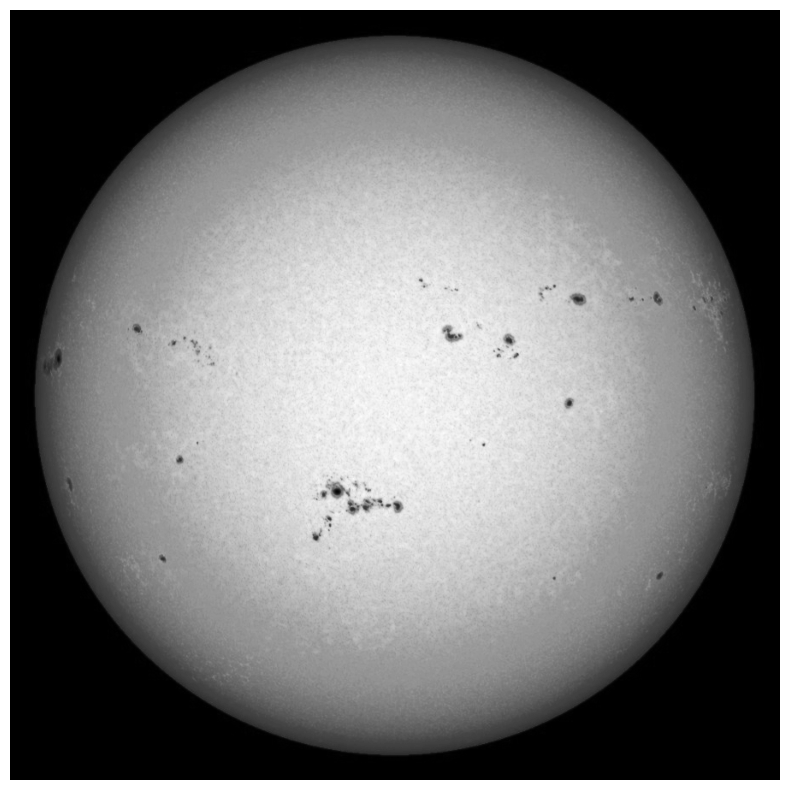

In [9]:
grey_img = [pixel.mean() for pixel in img_array.reshape(900*900, 3)]
plt.figure(figsize=(10,10))
plt.imshow(np.array(grey_img).reshape(900, 900), cmap="gray")
plt.axis("off")
plt.show()

## Machine Learning & Clustering

In [10]:
img_cropped.reshape(-1,3)

array([[252, 188, 117],
       [254, 191, 122],
       [255, 195, 128],
       ...,
       [252, 176,  92],
       [251, 173,  88],
       [251, 174,  86]], dtype=uint8)

In [11]:
img_array = img_array.reshape(-1, 3)
img_cropped = img_cropped.reshape(-1,3)

Sun's Pixels Count: 511304 out of 810000


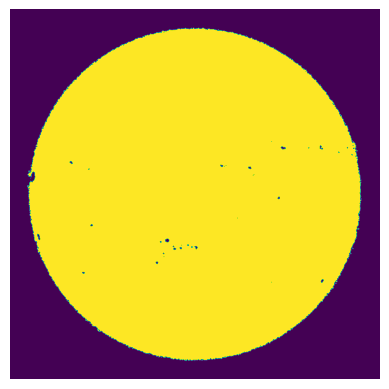

In [12]:
import sklearn
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=45)
clusters = kmeans.fit_predict(img_array)

means = [img_array[clusters == i].mean() for i in set(clusters)]

# propagating the image so it only contains two colors
propagated_img = np.array([means[pixel_cluster] for pixel_cluster in clusters]).reshape(900,900)

sun_pixel_count = len(clusters[clusters == 0])
print("Sun's Pixels Count:", sun_pixel_count, "out of", len(clusters))

plt.imshow(propagated_img)
plt.axis("off")
plt.show()

In [13]:
means

[140.27405222724641, 7.505349920989903]

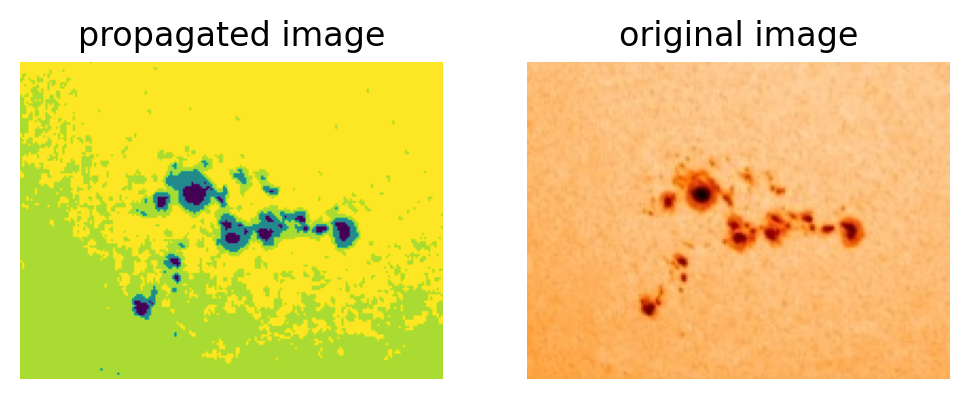

In [22]:
kmeans_crop = KMeans(n_clusters=4, random_state=45)
clusters_crop = kmeans_crop.fit_predict(img_cropped)

means_crop = [img_cropped[clusters_crop == i].mean() for i in set(clusters_crop)]

propagated_img_crop = np.array([means_crop[pixel_cluster] for pixel_cluster in clusters_crop]).reshape(150, 200)

plt.figure(figsize=(6,15), dpi = 200)
plt.subplot(121)
plt.imshow(propagated_img_crop)
plt.axis("off")
plt.title("propagated image")

plt.subplot(122)
plt.imshow(np.asarray(img.crop((300,500,500,650))))
plt.axis("off")
plt.title("original image")
plt.show()

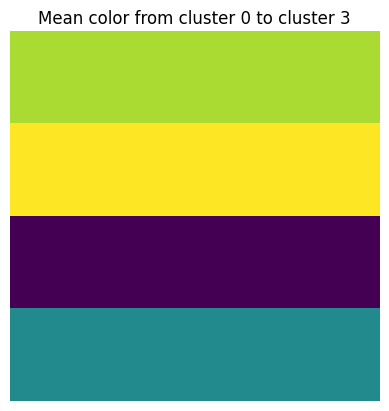

In [15]:
plt.imshow(np.array([[num]*100 for num in means_crop]).reshape(20,-1))
plt.axis("off")
plt.title("Mean color from cluster 0 to cluster 3")
plt.show()

It's obvious that umbra pixels are clustered in cluster 2 and the penumbra pixels are clustered in cluster 3.

## Calculations

In [16]:
umbra_pixel_count = len(clusters_crop[clusters_crop == 2])
penumbra_pixel_count = len(clusters_crop[clusters_crop == 3])
print("Umbra_pixel_count:", umbra_pixel_count)
print("Penumbra_pixel_count:", penumbra_pixel_count)

Umbra_pixel_count: 336
Penumbra_pixel_count: 870


In [17]:
from math import pi

sun_radius = 696340. #km
sun_half_surf_area = 0.5 * 4 * pi * sun_radius**2

relative_umbra_area = umbra_pixel_count / sun_pixel_count
relative_penumbra_area = penumbra_pixel_count / sun_pixel_count

umbra_area = relative_umbra_area * sun_half_surf_area
penumbra_area = relative_penumbra_area * sun_half_surf_area

In [18]:
relative_umbra_area

0.0006571433041791185

In [19]:
relative_penumbra_area

0.0017015317697495033

In [20]:
sun_half_surf_area

3046649926041.11

________________
__________________